<a href="https://colab.research.google.com/github/TAUforPython/stohasticsignal/blob/main/example%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# One timeseries dataset

<>:69: SyntaxWarning: invalid escape sequence '\s'
<>:93: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\s'
<>:93: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2274473560.py:69: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2, zorder=5)
/tmp/ipython-input-2274473560.py:93: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2)


LINEAR PROBABILITY MODEL (LPM) CONCEPT EXPLAINED
1.  What is LPM?
    - An LPM is a regression model where the dependent variable Y is binary (0 or 1).
    - It uses a linear regression equation: P(Y=1|X) = β₀ + β₁X₁ + ... + βₖXₖ
    - The output is interpreted as the probability of the event Y=1 occurring.

2.  Key Characteristics:
    - The predicted probabilities (Y_hat) can fall outside the [0, 1] range.
    - It assumes a linear relationship between X and the probability of Y=1.
    - While simple, it's often less preferred than Logistic or Probit models for
      binary outcomes due to probability constraint violations and non-normal errors.

3.  Why This Demonstration Uses a Continuous Function:
    - The provided ground truth function 'f(x) = x + 0.5*sin(2πx)' is continuous.
    - Standard LPMs are for binary Y. To demonstrate the core idea of fitting a
      linear model to potentially noisy data, we will use this continuous function.
    - This shows the fundamental regressio

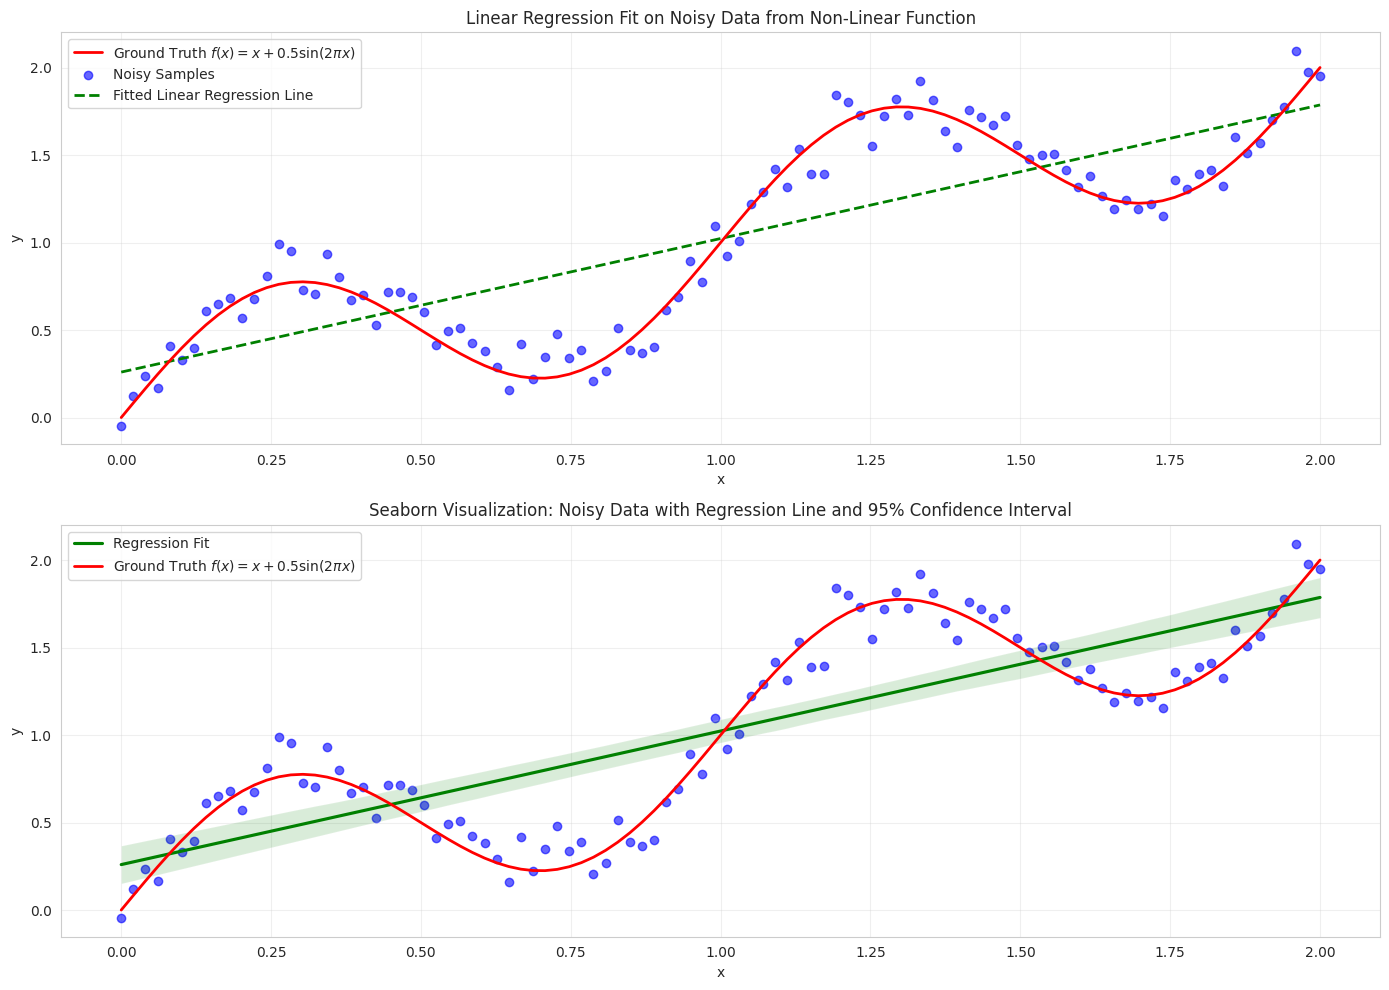


--- Model Summary (Linear Regression Approximation) ---
Fitted Model: Y = 0.260 + 0.763 * X
Mean Squared Error (MSE): 0.1093
R-squared (R²): 0.6444

--- Interpretation of Results ---
- The green dashed line is the best-fit linear model for the noisy data.
- The shaded area in the second plot represents the 95% confidence interval
  around the regression line, showing the uncertainty of the mean prediction.
- The R² value indicates how much of the variance in the noisy data is explained
  by this linear model. A low R² suggests the linear model is not a good fit
  for the underlying non-linear true function.
- The residuals plot shows a clear pattern, confirming that a linear model
  is not suitable for capturing the sinusoidal component of the true function.


In [35]:

# Set seaborn style for better plots
sns.set_style("whitegrid")

# --- Explanation of Linear Probability Model (LPM) ---
print("="*60)
print("LINEAR PROBABILITY MODEL (LPM) CONCEPT EXPLAINED")
print("="*60)
print("1.  What is LPM?")
print("    - An LPM is a regression model where the dependent variable Y is binary (0 or 1).")
print("    - It uses a linear regression equation: P(Y=1|X) = β₀ + β₁X₁ + ... + βₖXₖ")
print("    - The output is interpreted as the probability of the event Y=1 occurring.")
print("\n2.  Key Characteristics:")
print("    - The predicted probabilities (Y_hat) can fall outside the [0, 1] range.")
print("    - It assumes a linear relationship between X and the probability of Y=1.")
print("    - While simple, it's often less preferred than Logistic or Probit models for")
print("      binary outcomes due to probability constraint violations and non-normal errors.")
print("\n3.  Why This Demonstration Uses a Continuous Function:")
print("    - The provided ground truth function 'f(x) = x + 0.5*sin(2πx)' is continuous.")
print("    - Standard LPMs are for binary Y. To demonstrate the core idea of fitting a")
print("      linear model to potentially noisy data, we will use this continuous function.")
print("    - This shows the fundamental regression task: finding a linear approximation")
print("      (which might be suboptimal for this non-linear true function) to a relationship.")
print("    - We will fit a simple linear regression: Y = β₀ + β₁X + ε, similar to LPM's structure.")
print("="*60)

# --- Parameters for Data Generation ---
N_SAMPLES = 100  # Number of time series/data points
X_MIN, X_MAX = 0, 2  # Range of x values
NOISE_STD = 0.1  # Standard deviation of the random noise

# --- Generate the Ground Truth Function ---
x_true = np.linspace(X_MIN, X_MAX, N_SAMPLES) # High-resolution x for a smooth ground truth plot
y_true = x_true + 0.5 * np.sin(2 * np.pi * x_true)

# --- Generate Noisy Dataset ---
#x_data = np.random.uniform(X_MIN, X_MAX, N_SAMPLES)
x_data = x_true
noise = np.random.normal(0, NOISE_STD, N_SAMPLES)
y_data = x_data + 0.5 * np.sin(2 * np.pi * x_data) + noise

# Prepare data for scikit-learn (it expects 2D arrays for features)
X_for_sklearn = x_data.reshape(-1, 1)

# --- Fit the Linear Regression Model ---
model = LinearRegression()
model.fit(X_for_sklearn, y_data)

# --- Make Predictions ---
y_pred = model.predict(X_for_sklearn)

# --- Evaluate the Model ---
mse = mean_squared_error(y_data, y_pred)
r2 = r2_score(y_data, y_pred)

# --- Create Seaborn Visualization for y_data with Mean and 95% Confidence Interval ---
# Create a DataFrame for seaborn
df_plot = pd.DataFrame({
    'x': x_data,
    'y_data': y_data
})

# Create the main plot
plt.figure(figsize=(14, 10))

# Plot 1: Ground Truth, Noisy Data, and Fitted Line
plt.subplot(2, 1, 1)

# Plot ground truth
plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2, zorder=5)

# Plot noisy samples
plt.scatter(x_data, y_data, alpha=0.6, label='Noisy Samples', color='blue', zorder=3)

# Plot fitted line
plt.plot(x_data, y_pred, label='Fitted Linear Regression Line', color='green', linestyle='--', linewidth=2, zorder=4)

plt.title('Linear Regression Fit on Noisy Data from Non-Linear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Seaborn Visualization for y_data with Mean and 95% Confidence Interval
plt.subplot(2, 1, 2)

# Use seaborn's regplot to show the regression line with confidence interval
sns.regplot(data=df_plot, x='x', y='y_data',
            scatter_kws={'alpha':0.6, 'color':'blue', 'label':'Noisy Samples'},
            line_kws={'color':'green', 'label':'Regression Fit'},
            ci=95)  # 95% confidence interval

# Overlay the true function for comparison
plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2)

plt.title('Seaborn Visualization: Noisy Data with Regression Line and 95% Confidence Interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Print Model Summary ---
print("\n--- Model Summary (Linear Regression Approximation) ---")
print(f"Fitted Model: Y = {model.intercept_:.3f} + {model.coef_[0]:.3f} * X")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

print("\n--- Interpretation of Results ---")
print("- The green dashed line is the best-fit linear model for the noisy data.")
print("- The shaded area in the second plot represents the 95% confidence interval")
print("  around the regression line, showing the uncertainty of the mean prediction.")
print("- The R² value indicates how much of the variance in the noisy data is explained")
print("  by this linear model. A low R² suggests the linear model is not a good fit")
print("  for the underlying non-linear true function.")
print("- The residuals plot shows a clear pattern, confirming that a linear model")
print("  is not suitable for capturing the sinusoidal component of the true function.")
print("="*60)

#Example 2: statistical series of ground truth

<>:87: SyntaxWarning: invalid escape sequence '\s'
<>:99: SyntaxWarning: invalid escape sequence '\s'
<>:148: SyntaxWarning: invalid escape sequence '\s'
<>:87: SyntaxWarning: invalid escape sequence '\s'
<>:99: SyntaxWarning: invalid escape sequence '\s'
<>:148: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4216455933.py:87: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2, zorder=5)
/tmp/ipython-input-4216455933.py:99: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2, zorder=5)
/tmp/ipython-input-4216455933.py:148: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2)


LINEAR PROBABILITY MODEL (LPM) CONCEPT EXPLAINED
1.  What is LPM?
    - An LPM is a regression model where the dependent variable Y is binary (0 or 1).
    - It uses a linear regression equation: P(Y=1|X) = β₀ + β₁X₁ + ... + βₖXₖ
    - The output is interpreted as the probability of the event Y=1 occurring.

2.  Key Characteristics:
    - The predicted probabilities (Y_hat) can fall outside the [0, 1] range.
    - It assumes a linear relationship between X and the probability of Y=1.
    - While simple, it's often less preferred than Logistic or Probit models for
      binary outcomes due to probability constraint violations and non-normal errors.

3.  Why This Demonstration Uses a Continuous Function:
    - The provided ground truth function 'f(x) = x + 0.5*sin(2πx)' is continuous.
    - Standard LPMs are for binary Y. To demonstrate the core idea of fitting a
      linear model to potentially noisy data, we will use this continuous function.
    - This shows the fundamental regressio

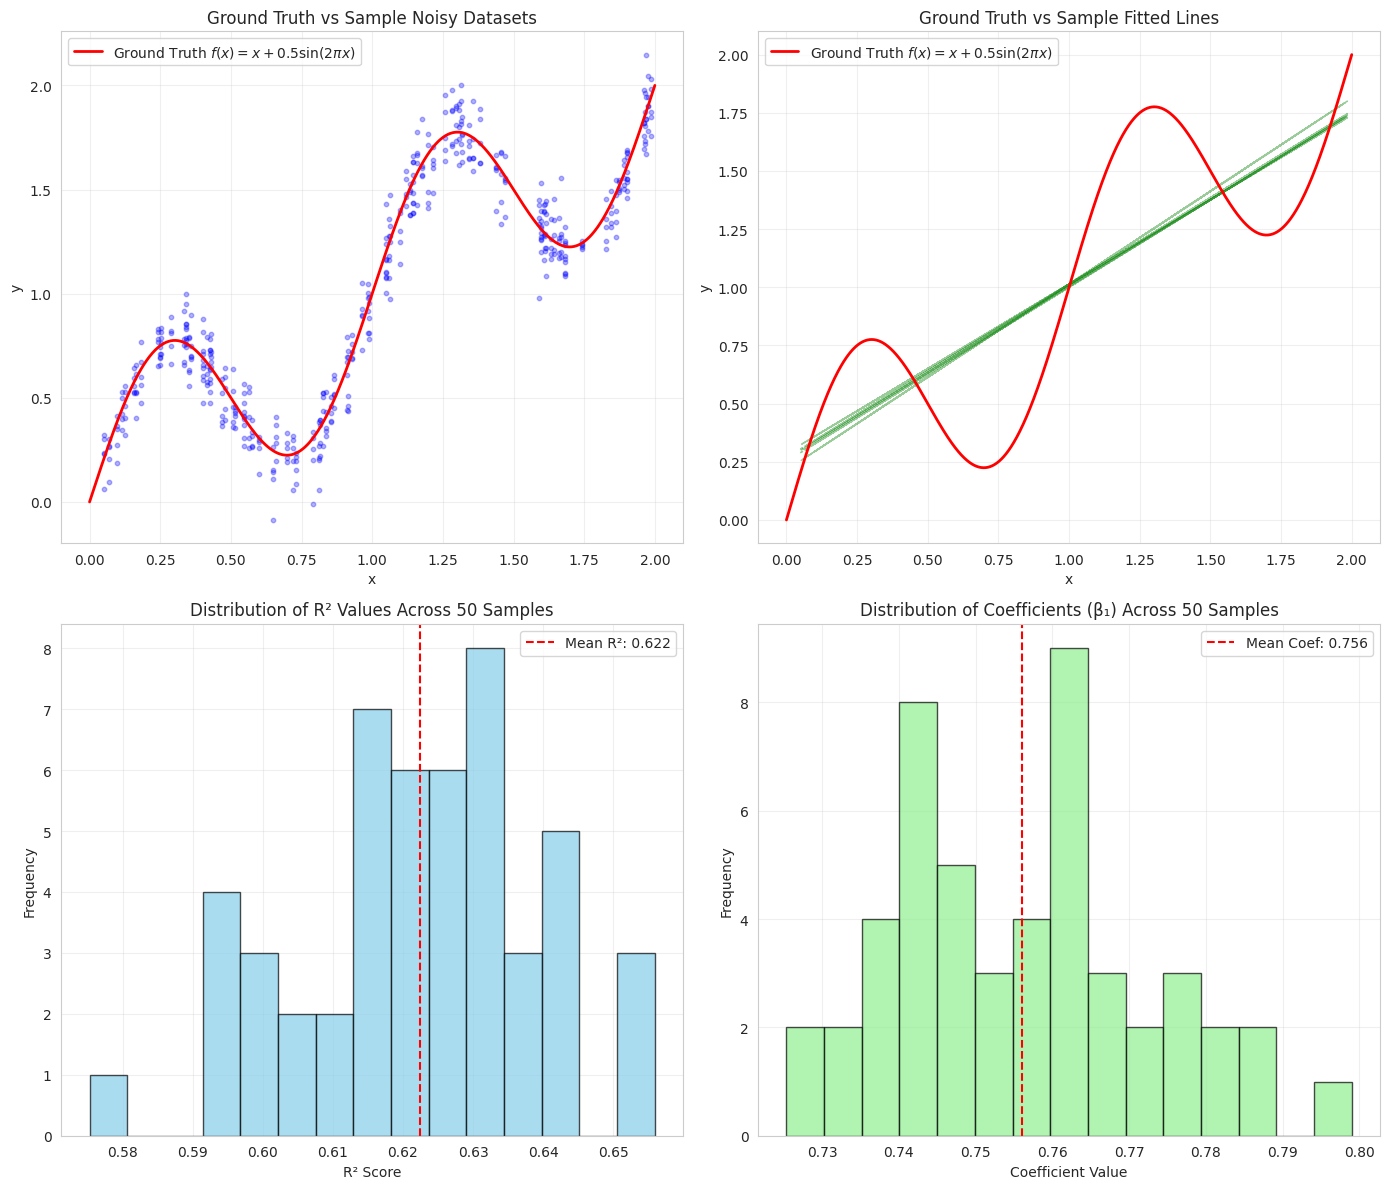

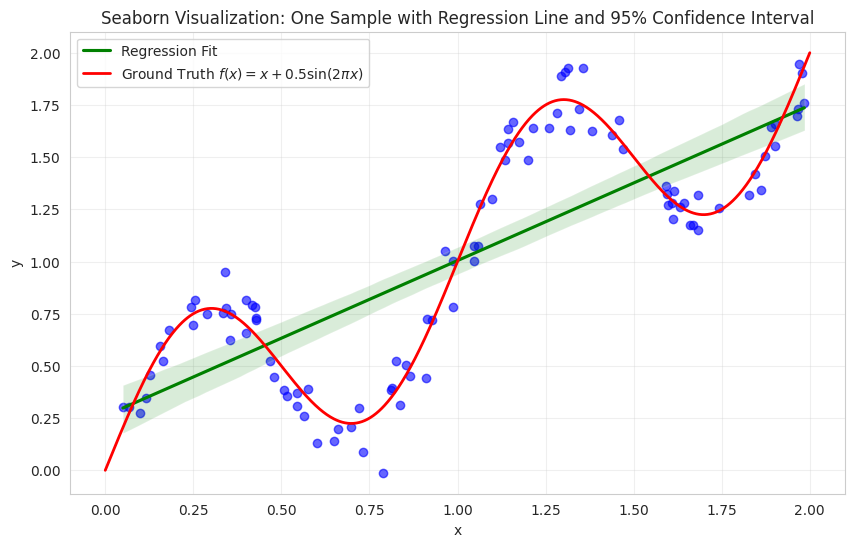


--- Statistical Summary Across 50 Samples ---
Mean Intercept (β₀): 0.2650 ± 0.0175
Mean Coefficient (β₁): 0.7561 ± 0.0166
Mean MSE: 0.1126 ± 0.0063
Mean R-squared (R²): 0.6225 ± 0.0169

--- Interpretation of Statistical Results ---
- The distribution of R² values shows the variability in how well the linear model
  fits different noisy samples of the same underlying function.
- The distribution of coefficients (β₁) shows how the linear approximation varies
  across different samples, reflecting the instability of the linear fit when the
  true relationship is non-linear.
- The confidence intervals in the seaborn plot represent the uncertainty in the
  predicted mean response, not the variability of the samples themselves.


In [37]:
# Set seaborn style for better plots
sns.set_style("whitegrid")

# --- Explanation of Linear Probability Model (LPM) ---
print("="*60)
print("LINEAR PROBABILITY MODEL (LPM) CONCEPT EXPLAINED")
print("="*60)
print("1.  What is LPM?")
print("    - An LPM is a regression model where the dependent variable Y is binary (0 or 1).")
print("    - It uses a linear regression equation: P(Y=1|X) = β₀ + β₁X₁ + ... + βₖXₖ")
print("    - The output is interpreted as the probability of the event Y=1 occurring.")
print("\n2.  Key Characteristics:")
print("    - The predicted probabilities (Y_hat) can fall outside the [0, 1] range.")
print("    - It assumes a linear relationship between X and the probability of Y=1.")
print("    - While simple, it's often less preferred than Logistic or Probit models for")
print("      binary outcomes due to probability constraint violations and non-normal errors.")
print("\n3.  Why This Demonstration Uses a Continuous Function:")
print("    - The provided ground truth function 'f(x) = x + 0.5*sin(2πx)' is continuous.")
print("    - Standard LPMs are for binary Y. To demonstrate the core idea of fitting a")
print("      linear model to potentially noisy data, we will use this continuous function.")
print("    - This shows the fundamental regression task: finding a linear approximation")
print("      (which might be suboptimal for this non-linear true function) to a relationship.")
print("    - We will fit a simple linear regression: Y = β₀ + β₁X + ε, similar to LPM's structure.")
print("="*60)

# --- Parameters for Data Generation ---
N_SAMPLES = 100  # Number of time series/data points per sample
N_Y_SAMPLES = 50  # Number of different y_data samples for statistical analysis
X_MIN, X_MAX = 0, 2  # Range of x values
NOISE_STD = 0.1  # Standard deviation of the random noise

# --- Generate the Ground Truth Function ---
x_true = np.linspace(X_MIN, X_MAX, 1000) # High-resolution x for a smooth ground truth plot
y_true = x_true + 0.5 * np.sin(2 * np.pi * x_true)

# --- Generate Multiple Noisy Datasets ---
x_data = np.random.uniform(X_MIN, X_MAX, N_SAMPLES)
all_y_data = []
all_y_pred = []

# Store metrics for statistical analysis
all_mse = []
all_r2 = []
all_intercepts = []
all_coefs = []

# Generate 50 different y_data samples
for i in range(N_Y_SAMPLES):
    noise = np.random.normal(0, NOISE_STD, N_SAMPLES)
    y_data_sample = x_data + 0.5 * np.sin(2 * np.pi * x_data) + noise
    all_y_data.append(y_data_sample)

    # Prepare data for scikit-learn
    X_for_sklearn = x_data.reshape(-1, 1)

    # Fit the Linear Regression Model
    model = LinearRegression()
    model.fit(X_for_sklearn, y_data_sample)

    # Make Predictions
    y_pred_sample = model.predict(X_for_sklearn)
    all_y_pred.append(y_pred_sample)

    # Calculate metrics
    mse = mean_squared_error(y_data_sample, y_pred_sample)
    r2 = r2_score(y_data_sample, y_pred_sample)
    all_mse.append(mse)
    all_r2.append(r2)
    all_intercepts.append(model.intercept_)
    all_coefs.append(model.coef_[0])

# --- Statistical Analysis of Model Parameters ---
mean_intercept = np.mean(all_intercepts)
std_intercept = np.std(all_intercepts)
mean_coef = np.mean(all_coefs)
std_coef = np.std(all_coefs)
mean_mse = np.mean(all_mse)
std_mse = np.std(all_mse)
mean_r2 = np.mean(all_r2)
std_r2 = np.std(all_r2)

# --- Visualization ---
plt.figure(figsize=(14, 12))

# Plot 1: Ground Truth and a few sample noisy datasets
plt.subplot(2, 2, 1)
plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2, zorder=5)
# Plot a few sample datasets
for i in range(min(5, N_Y_SAMPLES)):
    plt.scatter(x_data, all_y_data[i], alpha=0.3, color='blue', s=10)
plt.title('Ground Truth vs Sample Noisy Datasets')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Ground Truth and a few fitted lines
plt.subplot(2, 2, 2)
plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2, zorder=5)
# Plot a few fitted lines
for i in range(min(5, N_Y_SAMPLES)):
    plt.plot(x_data, all_y_pred[i], alpha=0.4, color='green', linestyle='--', linewidth=1)
plt.title('Ground Truth vs Sample Fitted Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Distribution of R² values
plt.subplot(2, 2, 3)
plt.hist(all_r2, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_r2, color='red', linestyle='--', label=f'Mean R²: {mean_r2:.3f}')
plt.title('Distribution of R² Values Across 50 Samples')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Distribution of Model Coefficients
plt.subplot(2, 2, 4)
plt.hist(all_coefs, bins=15, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(mean_coef, color='red', linestyle='--', label=f'Mean Coef: {mean_coef:.3f}')
plt.title('Distribution of Coefficients (β₁) Across 50 Samples')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Seaborn Visualization for One Representative Sample with Confidence Interval ---
plt.figure(figsize=(10, 6))

# Create a DataFrame for seaborn using the first sample
df_plot = pd.DataFrame({
    'x': x_data,
    'y_data': all_y_data[0]
})

# Use seaborn's regplot to show the regression line with confidence interval
sns.regplot(data=df_plot, x='x', y='y_data',
            scatter_kws={'alpha':0.6, 'color':'blue', 'label':'Noisy Samples'},
            line_kws={'color':'green', 'label':'Regression Fit'},
            ci=95)  # 95% confidence interval

# Overlay the true function for comparison
plt.plot(x_true, y_true, label='Ground Truth $f(x) = x + 0.5\sin(2\pi x)$', color='red', linewidth=2)

plt.title('Seaborn Visualization: One Sample with Regression Line and 95% Confidence Interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Print Statistical Summary ---
print("\n--- Statistical Summary Across 50 Samples ---")
print(f"Mean Intercept (β₀): {mean_intercept:.4f} ± {std_intercept:.4f}")
print(f"Mean Coefficient (β₁): {mean_coef:.4f} ± {std_coef:.4f}")
print(f"Mean MSE: {mean_mse:.4f} ± {std_mse:.4f}")
print(f"Mean R-squared (R²): {mean_r2:.4f} ± {std_r2:.4f}")

print("\n--- Interpretation of Statistical Results ---")
print("- The distribution of R² values shows the variability in how well the linear model")
print("  fits different noisy samples of the same underlying function.")
print("- The distribution of coefficients (β₁) shows how the linear approximation varies")
print("  across different samples, reflecting the instability of the linear fit when the")
print("  true relationship is non-linear.")
print("- The confidence intervals in the seaborn plot represent the uncertainty in the")
print("  predicted mean response, not the variability of the samples themselves.")
print("="*60)